In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('/content/Walmart.csv')


In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [35]:
df['Month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [36]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5


In [37]:
df['Holiday_Flag'].unique()

array([0, 1])

In [38]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
year            0
Day             0
dtype: int64

In [39]:
df['Date']=pd.to_datetime(df['Date'])

In [40]:
copy_df = df.copy()

In [41]:
copy_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19


In [42]:
df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [43]:
df

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


In [44]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [45]:
copy_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5


In [46]:
df

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


<Axes: xlabel='Date'>

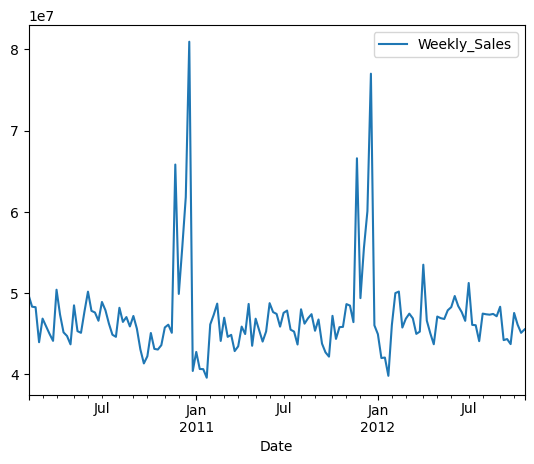

In [47]:
df.plot()

Figure(640x480)


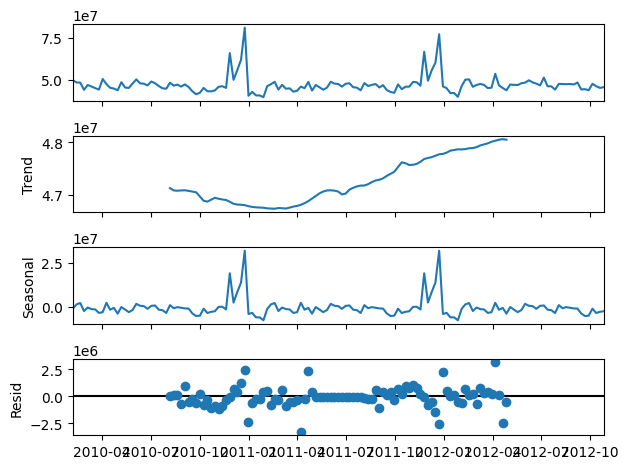

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df)
print(decomposed.plot())

In [49]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df)
pval = test_result[1]
print(pval)

2.675979158986003e-07


In [50]:
if pval<0.05:
  print('stationary')
else:
  print('non-stationary')

stationary


In [51]:
copy_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,year,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5


In [52]:
monthly_sales_data = pd.pivot_table(copy_df, values = "Weekly_Sales", columns = "year", index = "Month")
monthly_sales_data

year,2010,2011,2012
Month,,,
1,NaN,9.094665e+05,9.383026e+05
2,1.057405e+06,1.035174e+06,1.067020e+06
3,1.010666e+06,9.964247e+05,1.028932e+06
4,1.028499e+06,1.006784e+06,1.049561e+06
5,1.037283e+06,1.009156e+06,1.048703e+06
6,1.068034e+06,1.054297e+06,1.069379e+06
7,1.033689e+06,1.021828e+06,1.041719e+06
8,1.042445e+06,1.047774e+06,1.052670e+06
9,9.848216e+05,9.815455e+05,1.003586e+06


<Axes: xlabel='Month'>

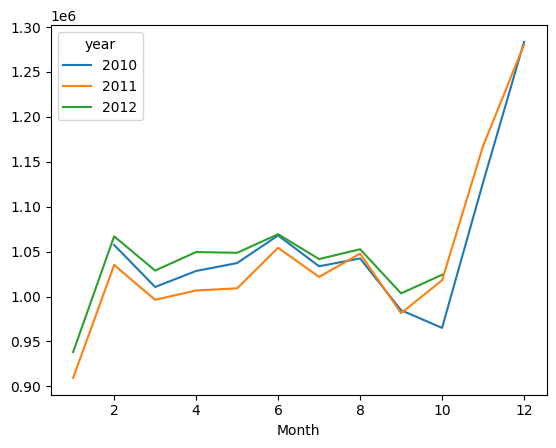

In [53]:
monthly_sales_data.plot()

In [54]:
yearly_sales_data = pd.pivot_table(copy_df, values = "Weekly_Sales", columns = "Month", index = "year")
yearly_sales_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,1.057405e+06,1.010666e+06,1.028499e+06,1.037283e+06,1.068034e+06,1.033689e+06,1.042445e+06,9.848216e+05,9.651637e+05,1.126963e+06,1.283380e+06
2011,909466.482389,1.035174e+06,9.964247e+05,1.006784e+06,1.009156e+06,1.054297e+06,1.021828e+06,1.047774e+06,9.815455e+05,1.018118e+06,1.167569e+06,1.280347e+06
2012,938302.620333,1.067020e+06,1.028932e+06,1.049561e+06,1.048703e+06,1.069379e+06,1.041719e+06,1.052670e+06,1.003586e+06,1.024232e+06,NaN,NaN


<Axes: >

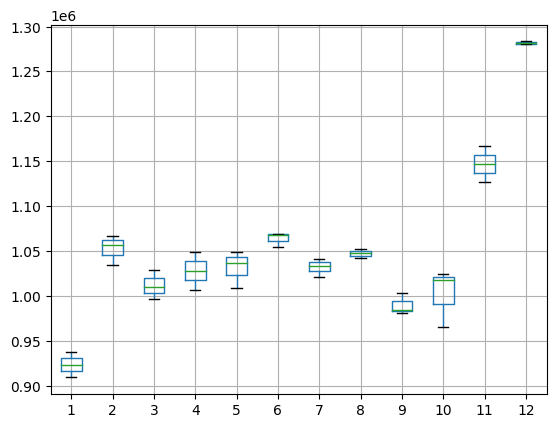

In [55]:
yearly_sales_data.boxplot()

In [56]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df)
pval = test_result[1]
print(pval)

2.675979158986003e-07


In [57]:
if pval<0.05:
  print('stationary')
else:
  print('non-stationary')

stationary


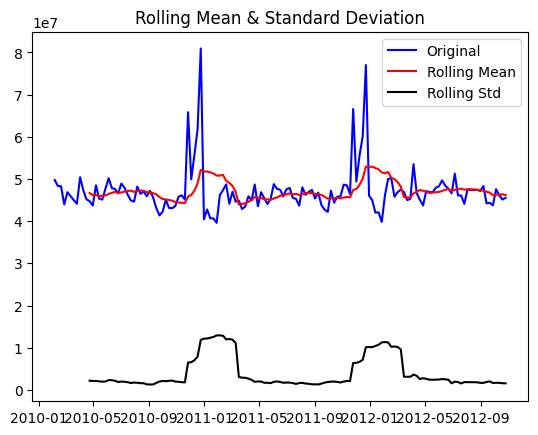

In [58]:
mean_log = df.rolling(window=12).mean()
std_log = df.rolling(window=12).std()
plt.plot(df,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [59]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df)
pval = test_result[1]
print(pval)

2.675979158986003e-07


In [60]:
if pval<0.05:
  print('stationary')
else:
  print('non-stationary')

stationary


In [61]:
df

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [62]:
train = df.iloc[:120]['Weekly_Sales']
test = df.iloc[120:]['Weekly_Sales']

In [63]:
train

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
                 ...     
2012-04-20    45072529.78
2012-04-27    43716798.89
2012-05-04    47124197.93
2012-05-11    46925878.99
2012-05-18    46823939.22
Name: Weekly_Sales, Length: 120, dtype: float64

In [64]:
test

Date
2012-05-25    47892463.31
2012-06-01    48281649.72
2012-06-08    49651171.78
2012-06-15    48412110.70
2012-06-22    47668284.97
2012-06-29    46597112.12
2012-07-06    51253021.88
2012-07-13    46099732.10
2012-07-20    46059543.45
2012-07-27    44097154.97
2012-08-03    47485899.56
2012-08-10    47403451.04
2012-08-17    47354452.05
2012-08-24    47447323.60
2012-08-31    47159639.43
2012-09-07    48330059.31
2012-09-14    44226038.65
2012-09-21    44354547.11
2012-09-28    43734899.40
2012-10-05    47566639.31
2012-10-12    46128514.25
2012-10-19    45122410.57
2012-10-26    45544116.29
Name: Weekly_Sales, dtype: float64

In [65]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
model = ARIMA(train, order=(5,1,0))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [67]:
model = model.fit()

In [68]:
df['ARIMA_pred'] = model.predict(start=len(train),end=len(train)+len(test)-1)

In [69]:
df

,Weekly_Sales,ARIMA_pred
Date,,
2010-02-05,49750740.50,NaN
2010-02-12,48336677.63,NaN
2010-02-19,48276993.78,NaN
2010-02-26,43968571.13,NaN
2010-03-05,46871470.30,NaN
...,...,...
2012-09-28,43734899.40,4.662762e+07
2012-10-05,47566639.31,4.664074e+07
2012-10-12,46128514.25,4.662928e+07


<Axes: xlabel='Date'>

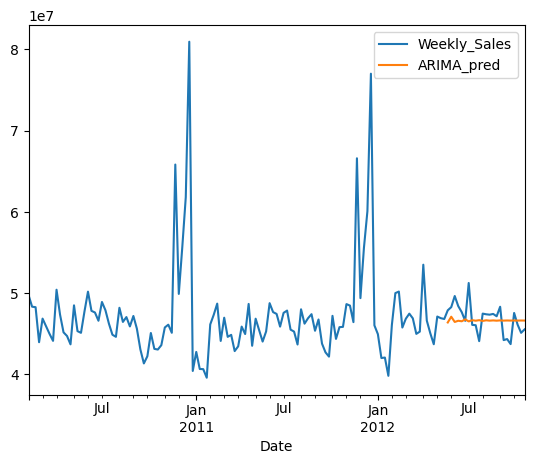

In [70]:
df[['Weekly_Sales','ARIMA_pred']].plot()

In [71]:
from sklearn.metrics import *


In [73]:
import itertools
p=range(0,7)
d=range(0,1)
q=range(0,7)
pdq = list(itertools.product(p,d,q))
order = []
rmse = []
for i in pdq:
  model = ARIMA(train, order=i)
  model = model.fit()
  pred= model.predict(start=len(train),end=len(train)+len(test)-1)
  error = np.sqrt(mean_squared_error(test,pred))
  rmse.append(error)
  order.append(i)
results = pd.DataFrame(index=order,data=rmse,columns=['RMSE'])
results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

,RMSE
"(0, 0, 0)",1.823596e+06
"(0, 0, 1)",1.824649e+06
"(0, 0, 2)",1.828990e+06
"(0, 0, 3)",1.820008e+06
"(0, 0, 4)",1.760410e+06
"(0, 0, 5)",1.815869e+06
"(0, 0, 6)",1.796017e+06
"(1, 0, 0)",1.827672e+06
"(1, 0, 1)",1.832770e+06
"(1, 0, 2)",1.830309e+06


In [74]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(6, 0, 2)",1.753137e+06
"(0, 0, 4)",1.760410e+06
"(6, 0, 1)",1.769189e+06
"(1, 0, 4)",1.792694e+06
"(0, 0, 6)",1.796017e+06
"(6, 0, 0)",1.806674e+06
"(5, 0, 1)",1.807788e+06
"(3, 0, 4)",1.807934e+06
"(5, 0, 0)",1.810265e+06
"(0, 0, 5)",1.815869e+06


In [75]:
model = ARIMA(train, order=(6,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [76]:
model = model.fit()

In [77]:
df['arima_prediction2'] = model.predict(start=len(train),end=len(train)+len(test)-1)

In [78]:
df

,Weekly_Sales,ARIMA_pred,arima_prediction2
Date,,,
2010-02-05,49750740.50,NaN,NaN
2010-02-12,48336677.63,NaN,NaN
2010-02-19,48276993.78,NaN,NaN
2010-02-26,43968571.13,NaN,NaN
2010-03-05,46871470.30,NaN,NaN
...,...,...,...
2012-09-28,43734899.40,4.716124e+07,4.714636e+07
2012-10-05,47566639.31,4.716124e+07,4.719564e+07
2012-10-12,46128514.25,4.716124e+07,4.712928e+07


<Axes: xlabel='Date'>

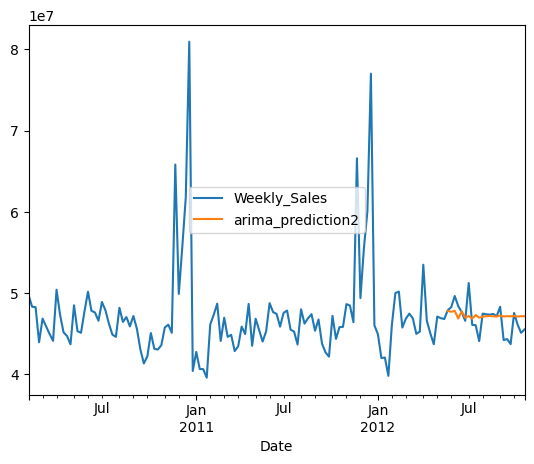

In [79]:
df[['Weekly_Sales','arima_prediction2']].plot()

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,order=(6,0,2),seasonal_order=(6,0,2,12))
model = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
df['sarimax_pred'] = model.predict(start=len(train),end=len(train)+len(test)-1)
df

,Weekly_Sales,ARIMA_pred,arima_prediction2,sarimax_pred
Date,,,,
2010-02-05,49750740.50,NaN,NaN,NaN
2010-02-12,48336677.63,NaN,NaN,NaN
2010-02-19,48276993.78,NaN,NaN,NaN
2010-02-26,43968571.13,NaN,NaN,NaN
2010-03-05,46871470.30,NaN,NaN,NaN
...,...,...,...,...
2012-09-28,43734899.40,4.716124e+07,4.714636e+07,4.630432e+07
2012-10-05,47566639.31,4.716124e+07,4.719564e+07,4.692442e+07
2012-10-12,46128514.25,4.716124e+07,4.712928e+07,4.644812e+07


<Axes: xlabel='Date'>

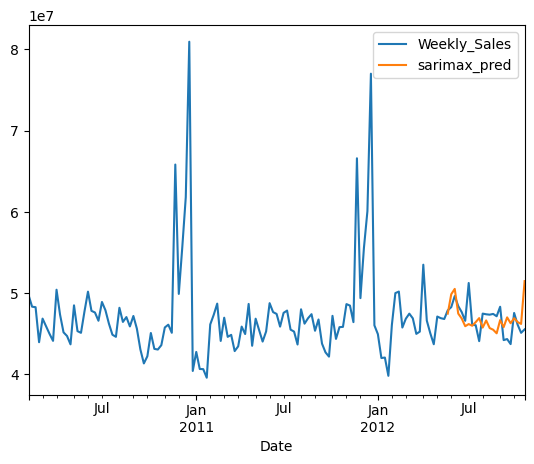

In [83]:
df[['Weekly_Sales','sarimax_pred']].plot()

<Axes: xlabel='Date'>

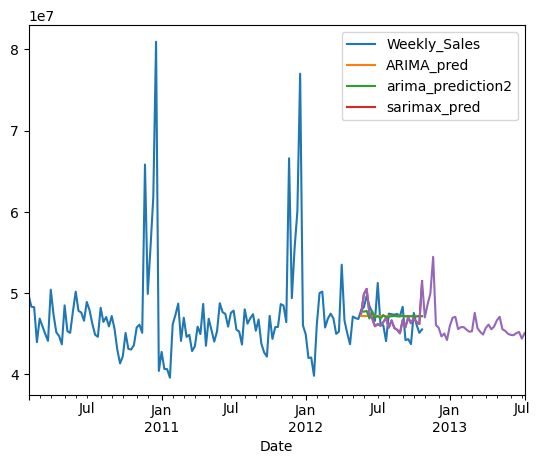

In [84]:
future = model.forecast(steps=60)
df.plot()
future.plot()